In [1]:

import pybliss
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt


In [2]:
data_loc = "/datasets/nathan/datasets/voyager_2020_data/"

# The structure here is so each observation target gets a list of files belonging to it
# [[list of on files], [off], [off], [off]]
#
cadence = pybliss.cadence([[f"{data_loc}/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5",
                    f"{data_loc}/single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.h5",
                    f"{data_loc}/single_coarse_guppi_59046_81310_DIAG_VOYAGER-1_0015.rawspec.0000.h5"
                    ],
                    [f"{data_loc}/single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.h5"],
                    [f"{data_loc}/single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.h5"],
                    [f"{data_loc}/single_coarse_guppi_59046_81628_DIAG_VOYAGER-1_0016.rawspec.0000.h5"]])

In [3]:

cadence = pybliss.flaggers.flag_filter_rolloff(cadence, .2)

cadence = pybliss.flaggers.flag_spectral_kurtosis(cadence, .02, 20)


spec kurtosis with M=16 and N=51
spec kurtosis with M=16 and N=51
spec kurtosis with M=16 and N=51
spec kurtosis with M=16 and N=51
spec kurtosis with M=16 and N=51
spec kurtosis with M=16 and N=51


In [4]:

noise_est_options = pybliss.estimators.noise_power_estimate_options()
noise_est_options.masked_estimate = True
noise_est_options.estimator_method = pybliss.estimators.noise_power_estimator.stddev
cadence = pybliss.estimators.estimate_noise_power(cadence, noise_est_options)


In [5]:
opts = pybliss.integrate_drifts_options()
opts.desmear = True
opts.low_rate = -48
opts.high_rate = 48
opts.rate_step_size = 1

cadence = pybliss.drift_search.integrate_drifts(cadence, opts)

We're doing cpu version
We're doing cpu version
We're doing cpu version
We're doing cpu version
We're doing cpu version
We're doing cpu version


In [6]:
hit_search_opts = pybliss.drift_search.hit_search_options()
hit_search_opts.method = pybliss.drift_search.hit_search_methods.connected_components
hit_search_opts.snr_threshold = 10
cadence = pybliss.drift_search.hit_search(cadence, hit_search_opts)


connected_components looking through 100663296 candidates with threshold 6.21099e+06
connected_components looking through 100663296 candidates with threshold 1.24494e+07
connected_components looking through 100663296 candidates with threshold 6.90274e+06
connected_components looking through 100663296 candidates with threshold 2.11755e+07
connected_components looking through 100663296 candidates with threshold 1.02085e+07
connected_components looking through 100663296 candidates with threshold 6.10186e+06


In [7]:
events = pybliss.drift_search.event_search(cadence)
for e in events:
    print(e)

event: .starting_frequency_Hz=8419565239 .average_drift_rate_Hz_per_sec=-0.36.average_power=0 .average_snr=905.716 .event_start_seconds=5.10165e+09 .event_end_seconds=5.10165e+09
.hits=[{"hit: .start_freq_MHz=8419.565239 (.index=651993), .drift_rate_Hz_per_second=-0.344394 (.index=84), .SNR=1641.192017, .power=0, bandwidth=399.5", "hit: .start_freq_MHz=8419.564990 (.index=651965), .drift_rate_Hz_per_second=-0.353960 (.index=85), .SNR=216.908142, .power=0, bandwidth=332.5", "hit: .start_freq_MHz=8419.564736 (.index=652171), .drift_rate_Hz_per_second=-0.392226 (.index=89), .SNR=859.046692, .power=0, bandwidth=385.6"}]Event was found in an off scan
Event was found in an off scan

event: .starting_frequency_Hz=8419542734 .average_drift_rate_Hz_per_sec=-0.37.average_power=0 .average_snr=59549.9 .event_start_seconds=5.10165e+09 .event_end_seconds=5.10165e+09
.hits=[{"hit: .start_freq_MHz=8419.542734 (.index=659988), .drift_rate_Hz_per_second=-0.344394 (.index=84), .SNR=110775.031250, .power=

In [8]:
flattened_scans = [scan for observation in cadence.observations for scan in observation.scans]
flattened_scans = sorted(flattened_scans, key=lambda x: x.tstart)


8421.38671875
-2.7939677238464355e-06
8418.45703125
8421.38671875


/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


8421.38671875
-2.7939677238464355e-06
8418.45703125
8421.38671875
8421.38671875
-2.7939677238464355e-06
8418.45703125
8421.38671875
8421.38671875
-2.7939677238464355e-06
8418.45703125
8421.38671875
8421.38671875
-2.7939677238464355e-06
8418.45703125
8421.38671875
8421.38671875
-2.7939677238464355e-06
8418.45703125
8421.38671875


Text(0.5, 0, 'Frequency [MHz]')

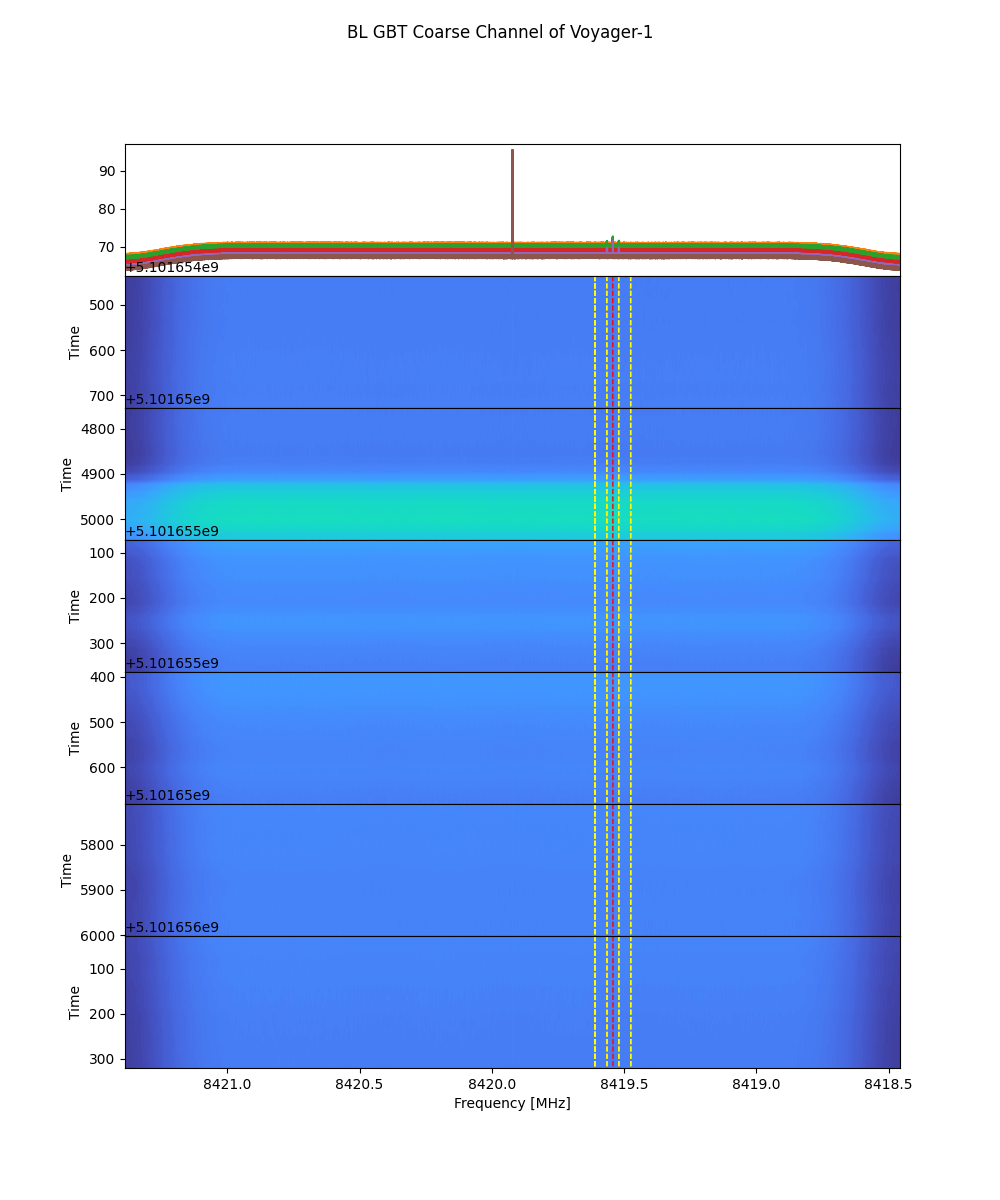

In [9]:
# fig, (axes) = plt.subplots(6, 2, sharex=True)
n_plots = 6
fig, axes = plt.subplots(1+n_plots, 1, sharex=True, sharey=False, figsize=(10, 2*n_plots))

plt.suptitle("BL GBT Coarse Channel of Voyager-1")

for nn, plot_scan in enumerate(flattened_scans):
    plot_data = np.from_dlpack(plot_scan.data)

    fch1 = plot_scan.fch1
    print(fch1)
    foff = plot_scan.foff
    print(foff)
    nchans = plot_scan.nchans
    freqs = np.linspace(fch1, fch1 + foff * nchans, nchans)
    print(np.min(freqs))
    print(np.max(freqs))


    axes[0].plot(freqs, 10* np.log10(plot_data.mean(0)))
    # axes[nn,0].set_ylabel("Power [dB]")

    start_time = plot_scan.tstart * 24 * 60 * 60
    end_time = start_time + plot_scan.tsamp * plot_data.shape[0]
    axes[nn+1].imshow(10*np.log10(plot_data), aspect="auto", interpolation=None, cmap="turbo", extent=[freqs[0], freqs[-1], end_time, start_time])
    axes[nn+1].set_ylabel("Time")

    for e in events:
        start_freq = e.starting_frequency_Hz + (start_time - e.event_start_seconds) * e.average_drift_rate_Hz_per_sec
        end_freq = start_freq + (end_time - start_time) * e.average_drift_rate_Hz_per_sec
        color = "red"
        if len(e.hits) == 2:
            color = "yellow"
        axes[nn+1].plot((start_freq/1e6, end_freq/1e6), (start_time, end_time), ls='dashed', lw=1, color=color)

plt.margins(0)
plt.subplots_adjust(hspace=0,wspace=0)


plt.xlabel("Frequency [MHz]")



In [10]:
axes[0].legend(["scan 0", "scan 1", "scan 2", "scan 3", "scan 4", "scan 5", ])